<div class="alert alert-block alert-warning">

<h1>Breast Cancer</h1>
    
<a href="https://www.kaggle.com/datasets/marshuu/breast-cancer">Kaggle Link</a>

    
<h2>About Dataset</h2>
<blockquote>Breast cancer Wisconsin (original) dataset contains real data of 699 observations with independent variables that allows you to classify dependent variable into malignant or benign.</blockquote>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>Clump Thickness:</strong> indicating grouping of cancer cells in multilayer.</p>
    <p><strong>Uniformity of Cell Size:</strong> indicating metastasis to lymph nodes.</p>
    <p><strong>Uniformity of Cell Shape:</strong> identifying cancerous cells of varying size.</p>
    <p><strong>Marginal Adhesion:</strong> suggesting loss of adhesion, i.e., a sign of malignancy but the cancerous cells lose this property so this retention of adhesion is an indication of malignancy.</p>
    <p><strong>Single Epithelial Cell Size:</strong> if the single epithelial cell size become larger, it may be a malignant cell.</p>
    <p><strong>Bare Nuclei:</strong> without cytoplasm coating, found in benign tumors.</p>
    <p><strong>Bland Chromatin:</strong> usually found in benign cells.</p>
    <p><strong>Normal Nucleoli:</strong> generally very small in benign cells.</p>
    <p><strong>Mitoses:</strong> the process in cell division by which the nucleus divides.</p>
    <p><strong>Class:</strong> malignant = 4 | benign = 2.</p>
</div>

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
df.columns = map(str.lower,df.columns)

## EDA

In [8]:
df.isnull().sum()

clump thickness                0
uniformity of cell size        0
uniformity of cell shape       0
marginal adhesion              0
single epithelial cell size    0
bare nuclei                    0
bland chromatin                0
normal nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump thickness              683 non-null    int64
 1   uniformity of cell size      683 non-null    int64
 2   uniformity of cell shape     683 non-null    int64
 3   marginal adhesion            683 non-null    int64
 4   single epithelial cell size  683 non-null    int64
 5   bare nuclei                  683 non-null    int64
 6   bland chromatin              683 non-null    int64
 7   normal nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
uniformity of cell size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
uniformity of cell shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
marginal adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
single epithelial cell size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
bare nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
normal nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [11]:
df.corr()['class'].sort_values(ascending=False)[1:]

bare nuclei                    0.822696
uniformity of cell shape       0.821891
uniformity of cell size        0.820801
bland chromatin                0.758228
normal nucleoli                0.718677
clump thickness                0.714790
marginal adhesion              0.706294
single epithelial cell size    0.690958
mitoses                        0.423448
Name: class, dtype: float64

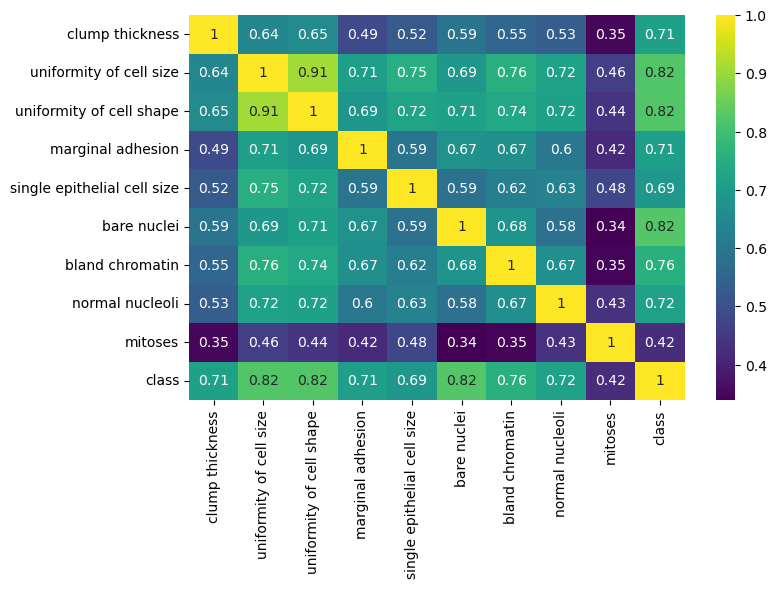

In [12]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis');

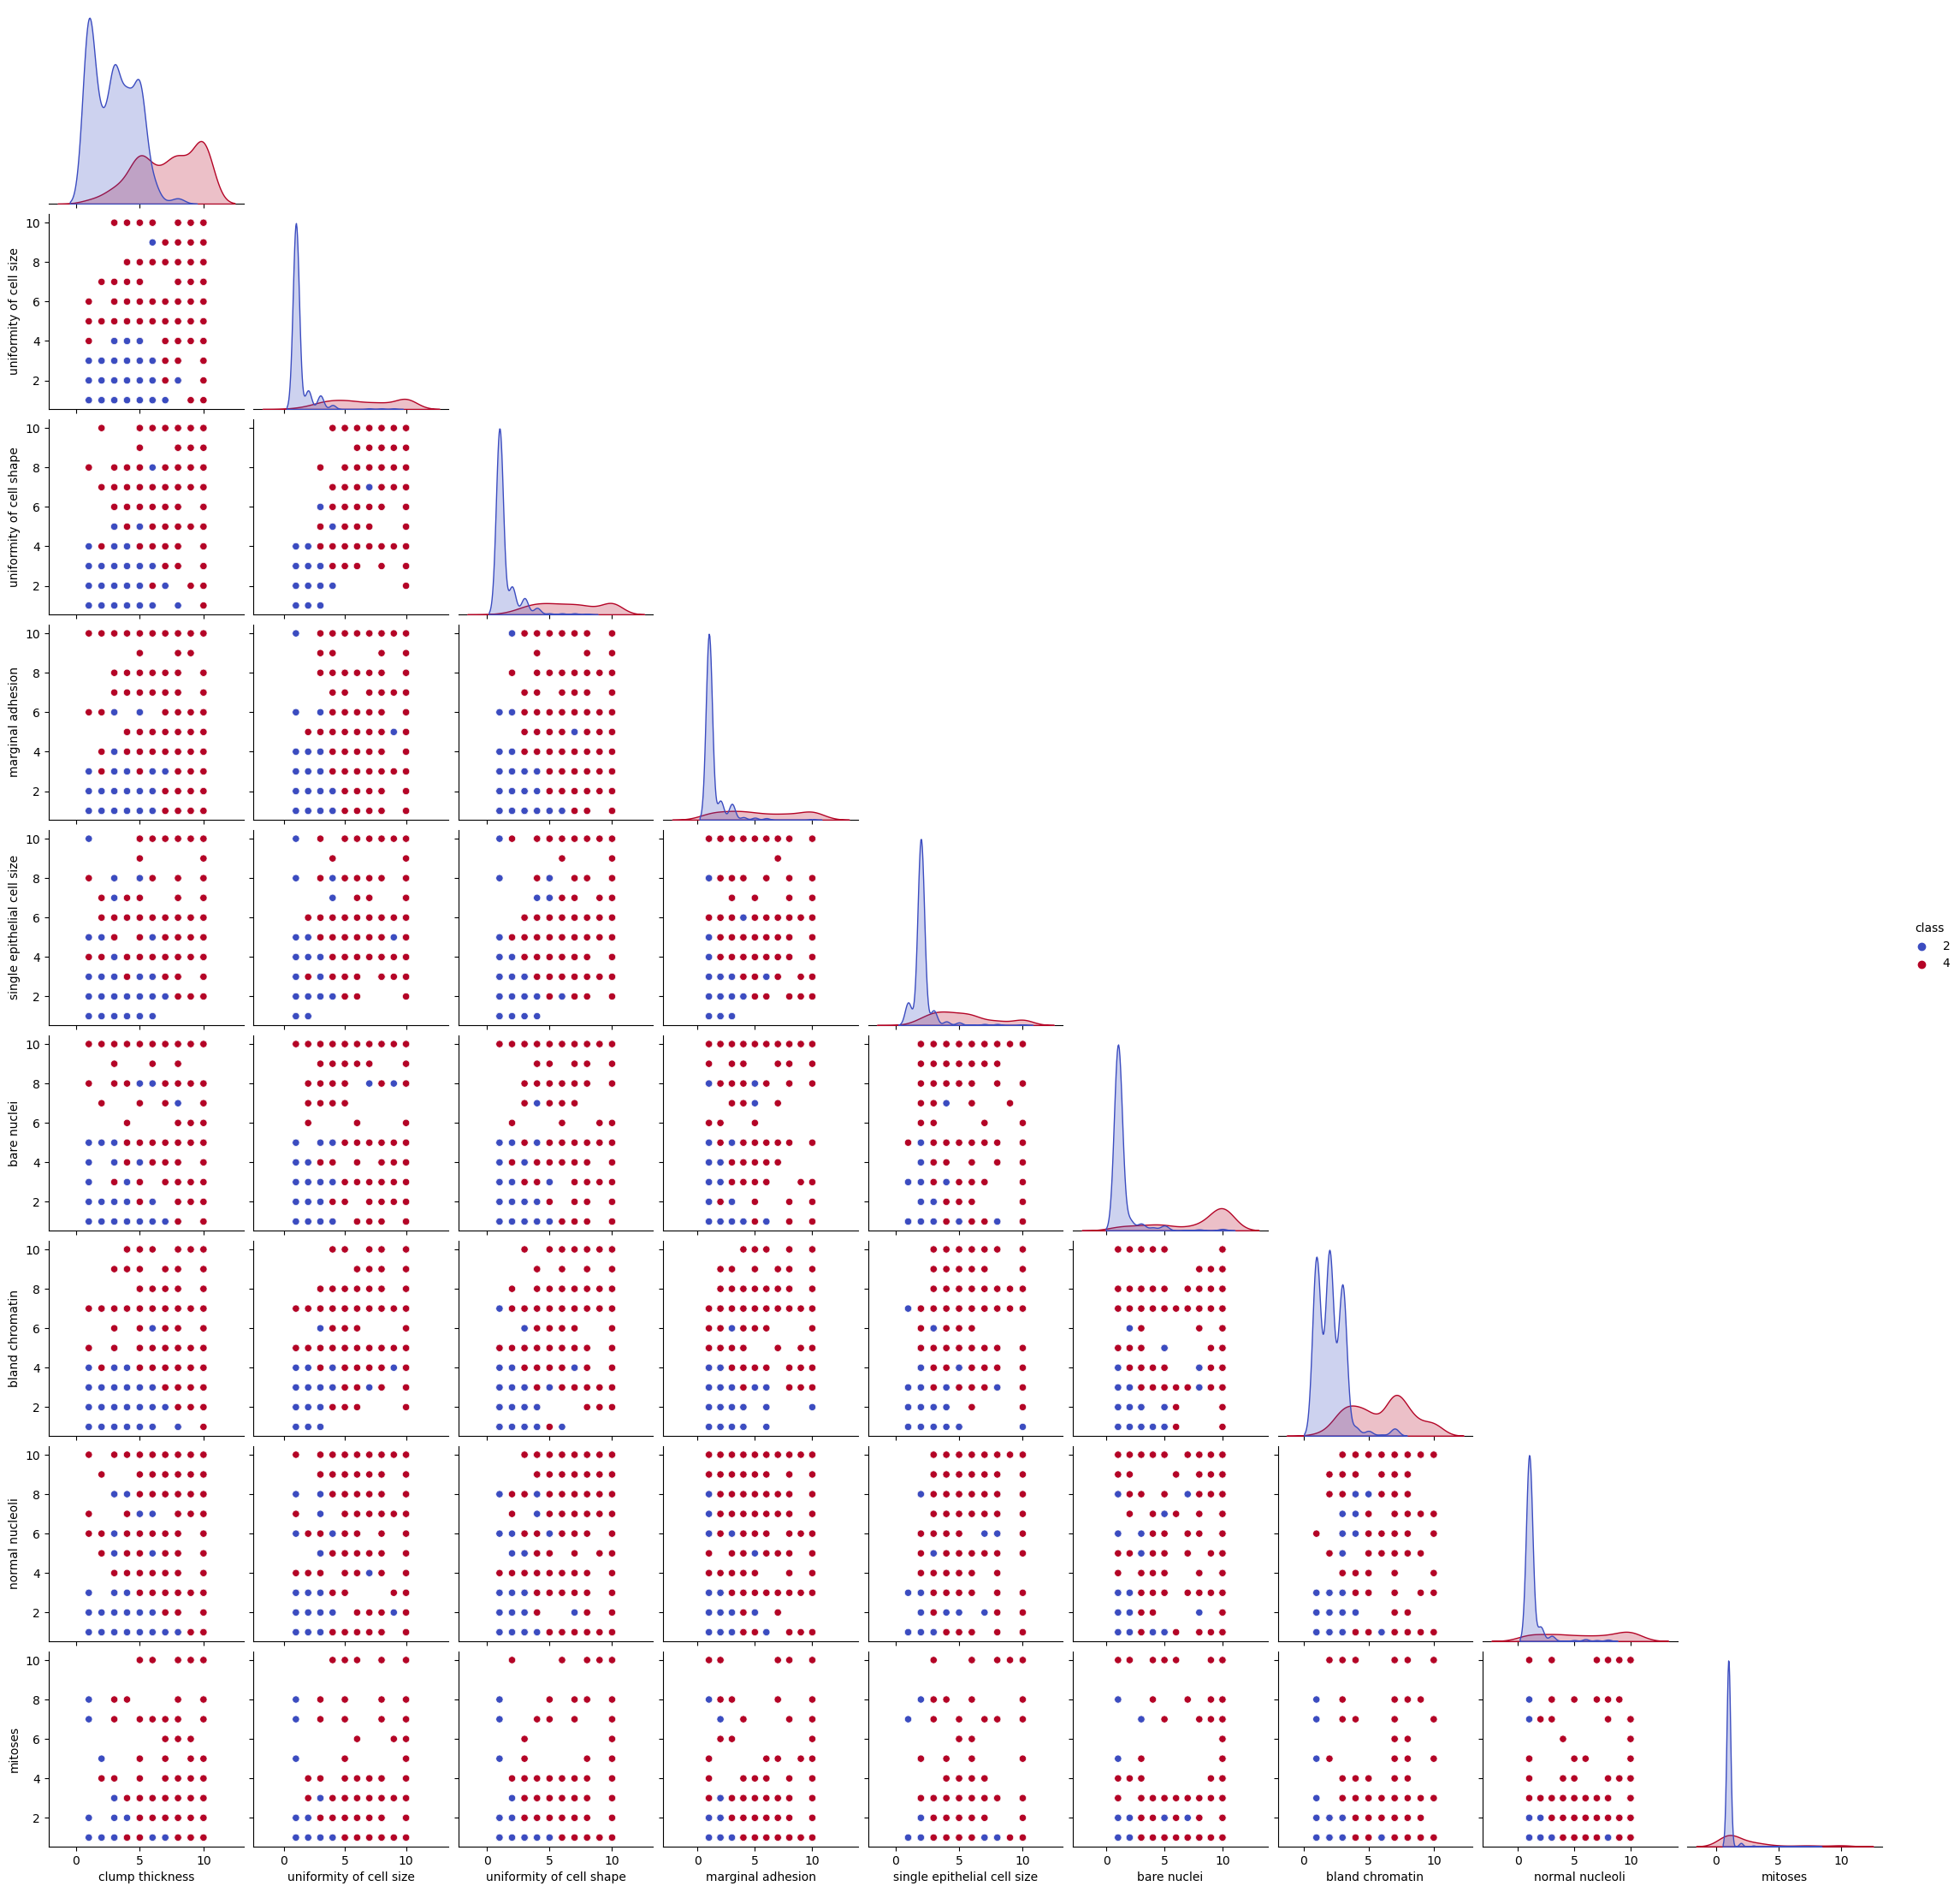

In [13]:
sns.pairplot(data = df, hue = 'class',palette='coolwarm',corner=True);

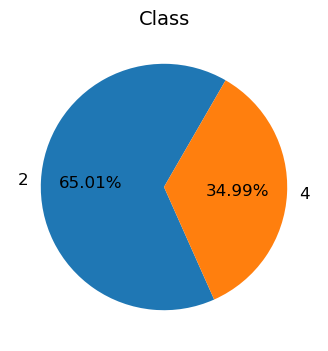

In [14]:
plt.figure(figsize = (6,4))
plt.pie(df['class'].value_counts(),labels = [2,4],textprops={'size':12},autopct='%.2f%%',startangle=60)
plt.title('Class',size = 14)
plt.show()

## Create Independent and Dependent Variables

In [15]:
X = df.drop('class',axis = 1).values
y = df['class'].values

## Split the Data Into the Train and Test Sets

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Machine Learning Models

In [17]:
def display_result(y_pred,modelName):
    print(modelName.center(75,'_'),end='\n\n')

    print('Accuracy Score:',round(accuracy_score(y_test,y_pred),3),end='\n\n')
    print('Classification Report'.center(75,'_'),end='\n\n')
    print(classification_report(y_test,y_pred),end='\n\n')
    
    print('Confusion Matrix'.center(75,'_'),end='\n\n')
    print(confusion_matrix(y_test,y_pred))

In [18]:
def grid_search(estimator,param_grid):
    gridSearch = GridSearchCV(estimator=estimator,param_grid=param_grid,cv = 10,n_jobs=-1)
    gridSearch.fit(X_train,y_train)
    print('Best Parameters:',gridSearch.best_params_)

### Random Forest

In [19]:
rf_model = RandomForestClassifier(random_state=0).fit(X_train,y_train)
rf_params = {
    'n_estimators':[100,200,500,1000],
    'criterion':['entropy','gini'],
    'max_depth':[None,3,4,5]
}
grid_search(rf_model,rf_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500}


In [20]:
rf_model_tuned = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=3,random_state=0).fit(X_train,y_train)
rf_pred = rf_model_tuned.predict(X_test)
display_result(rf_pred,'Random Forest')

_______________________________Random Forest_______________________________

Accuracy Score: 0.961

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       130
           4       0.95      0.95      0.95        75

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  4  71]]


### Decision Tree

In [21]:
dt_model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_params = {
    'criterion':['entropy','gini'],
    'max_depth':[None,3,4,5],
    'min_samples_split':[2,3,4]
}
grid_search(dt_model,dt_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [22]:
dt_model_tuned = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=4,min_samples_split=2).fit(X_train,y_train)
dt_pred = dt_model_tuned.predict(X_test)
display_result(dt_pred,'Decision Tree')

_______________________________Decision Tree_______________________________

Accuracy Score: 0.937

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.94      0.96      0.95       130
           4       0.93      0.89      0.91        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205


______________________________Confusion Matrix_____________________________

[[125   5]
 [  8  67]]


### KNN

In [23]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_params = {'n_neighbors':np.arange(3,50,2)}
grid_search(knn_model,knn_params)

Best Parameters: {'n_neighbors': 7}


In [24]:
knn_model_tuned = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
knn_pred = knn_model_tuned.predict(X_test)
display_result(knn_pred,'KNN')

____________________________________KNN____________________________________

Accuracy Score: 0.951

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       130
           4       0.96      0.91      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205


______________________________Confusion Matrix_____________________________

[[127   3]
 [  7  68]]


### Naive Bayes

In [25]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
display_result(nb_pred,'Gaussian Naive Bayes')

____________________________Gaussian Naive Bayes___________________________

Accuracy Score: 0.946

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.98      0.93      0.96       130
           4       0.89      0.97      0.93        75

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205


______________________________Confusion Matrix_____________________________

[[121   9]
 [  2  73]]


### MLP

In [26]:
mlp_model = MLPClassifier(random_state=0).fit(X_train,y_train)
mlp_params = {
    'hidden_layer_sizes':[(100,0),(10,10),(10,5)],
    'solver':['adam','lbfgs','sgd'],
    'activation':['relu','logistic'],
    'alpha':[0.0001,0.001,0.01]
}
grid_search(mlp_model,mlp_params)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'solver': 'adam'}


In [27]:
mlp_model_tuned = MLPClassifier(random_state=0,activation='relu',alpha=0.001,hidden_layer_sizes =(10,5),solver='adam')
mlp_model_tuned.fit(X_train,y_train)

mlp_pred = mlp_model_tuned.predict(X_test)
display_result(mlp_pred,'Multilayer Perceptron')

___________________________Multilayer Perceptron___________________________

Accuracy Score: 0.941

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.94      0.97      0.95       130
           4       0.94      0.89      0.92        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  8  67]]


### Logistic Regression

In [28]:
lr_model = LogisticRegression(random_state=0).fit(X_train,y_train)
lr_params = {
    'C':np.arange(1,6),
    'tol':[0.0001,0.001,0.01],
    'solver':['adam','lbfgs','sgd']
}
grid_search(lr_model,lr_params)

Best Parameters: {'C': 1, 'solver': 'lbfgs', 'tol': 0.0001}


In [29]:
lr_model_tuned = LogisticRegression(C=1, solver='lbfgs', tol = 0.0001).fit(X_train,y_train)
lr_pred = lr_model_tuned.predict(X_test)
display_result(lr_pred,'Logistic Regression')

____________________________Logistic Regression____________________________

Accuracy Score: 0.956

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       130
           4       0.95      0.93      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  5  70]]


### XGB

In [30]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [31]:
xgb_model = XGBClassifier().fit(X_train,y_train_encoded)
xgb_params = {
    'n_estimators':[100,200,500,1000],
    'max_depth':[None,3,4,5],
    'learning_rate': [0.1, 0.01, 0.02],
    'subsample': [0.6, 0.8, 1.0]
}

gridSearch = GridSearchCV(estimator=xgb_model,param_grid=xgb_params,cv = 10,n_jobs=-1)
gridSearch.fit(X_train,y_train_encoded)
print('Best Parameters:',gridSearch.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200, 'subsample': 0.8}


In [32]:
xgb_model_tuned = XGBClassifier(learning_rate = 0.1, max_depth = None, n_estimators = 200, subsample = 0.8)
xgb_model_tuned.fit(X_train,y_train_encoded)
xgb_pred = xgb_model_tuned.predict(X_test)
xgb_pred[xgb_pred== 1] = 4
xgb_pred[xgb_pred== 0] = 2
display_result(xgb_pred,'XGBoost')

__________________________________XGBoost__________________________________

Accuracy Score: 0.956

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       130
           4       0.93      0.95      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


______________________________Confusion Matrix_____________________________

[[125   5]
 [  4  71]]


### LightGBM

In [33]:
lgbm_model = LGBMClassifier(random_state=0).fit(X_train,y_train)
lgbm_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [-1, 3, 4, 5],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]
}
grid_search(lgbm_model,lgbm_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20, 'n_estimators': 500, 'subsample': 0.6}


In [34]:
lgbm_model_tuned = LGBMClassifier(random_state=0,learning_rate=0.05,max_depth=4,min_child_samples=20,n_estimators=500,subsample=0.6)
lgbm_model_tuned.fit(X_train,y_train)
lgbm_pred = lgbm_model_tuned.predict(X_test)
display_result(lgbm_pred,'LightGBM')

__________________________________LightGBM_________________________________

Accuracy Score: 0.946

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       130
           4       0.96      0.89      0.92        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205


______________________________Confusion Matrix_____________________________

[[127   3]
 [  8  67]]


## Predict a Single Value

In [35]:
models = [
    rf_model_tuned,
    dt_model_tuned,
    knn_model_tuned,
    nb_model,
    mlp_model_tuned,
    lr_model_tuned,
    xgb_model_tuned,
    lgbm_model_tuned
]
class_names = {4:'Maligant',2:'Benign'}

In [36]:
def select_model():
    print('\n1. Random Forest\n2. Decision Tree\n3. KNN\n4. Naive Bayes\n5. MLP\n6. Logistic Regression\n7. XGBoost\n8. LightGBM')
    while True:
        try:
            model_id = int(input('Select machine learning model id: '))
            if model_id <1 or model_id >8:
                continue
            else:
                break
        except Exception as ex:
            print(ex)
            choice = input("\nPress any key to continue or press 'e' to exit: ").lower()
            if choice == 'e':
                model_id = 0
                break
                
    return model_id

In [39]:
i = 1
while True:
    try:
        print('\n')
        print(f'Prediction {i}'.center(50,'_'),end='\n\n')
        clump_thickness = int(input('Clump Thickness: '))
        uniformity_of_cell_size = int(input('Uniformity of cell size: '))
        uniformity_of_cell_shape = int(input('Uniformity of cell shape: '))
        marginal_adhesion = int(input('Marginal adhesion: '))
        single_epithelial_cell_size = int(input('Single epithelial cell size: '))
        bare_nuclei = int(input('Bare nuclei: '))
        bland_chromatin = int(input('Bland chromatin: '))
        normal_nucleoli = int(input('Normal nucleoli: '))
        mitoses = int(input('Mitoses: '))
        
        values = [[
            clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,
            single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
        ]]
        
        model_id = select_model()-1
        if model_id == -1:
            break
        
        prediction = models[model_id].predict(values)[0]
        if model_id == 6: #xgboost
            prediction = (prediction+1)*2
        
        print('\nPredicted class is:',class_names[prediction])
        i+=1
            
    except Exception as ex:
        print(ex)
        
    finally:
        choice = input("\nPress any key to continue or press 'e' to exit: ").lower()
        if choice == 'e':
            break



___________________Prediction 1___________________

Clump Thickness: 5
Uniformity of cell size: 10
Uniformity of cell shape: 10
Marginal adhesion: 3
Single epithelial cell size: 7
Bare nuclei: 3
Bland chromatin: 8
Normal nucleoli: 10
Mitoses: 2

1. Random Forest
2. Decision Tree
3. KNN
4. Naive Bayes
5. MLP
6. Logistic Regression
7. XGBoost
8. LightGBM
Select machine learning model id: 7

Predicted class is: Maligant

Press any key to continue or press 'e' to exit: 


___________________Prediction 2___________________

Clump Thickness: 3
Uniformity of cell size: 1
Uniformity of cell shape: 1
Marginal adhesion: 1
Single epithelial cell size: 3
Bare nuclei: 2
Bland chromatin: 1
Normal nucleoli: 1
Mitoses: 1

1. Random Forest
2. Decision Tree
3. KNN
4. Naive Bayes
5. MLP
6. Logistic Regression
7. XGBoost
8. LightGBM
Select machine learning model id: 5

Predicted class is: Benign

Press any key to continue or press 'e' to exit: e
